# ESTIMATION OF ANNUAL INSURANCE CHARGES

#PROBLEM STATEMENT

> ACME Insurance Inc. offers affordable health insurance to thousands of customer all over the United States.**I need to create an automated system to estimate the annual medical expenditure for new customers**, using information such as their age, sex, BMI, children, smoking habits and region of residence. 



# 1. DATA ACQUISITION

# **Dataset source**
[Data Set](https://github.com/stedy/Machine-Learning-with-R-datasets)

In [2]:
import pandas as pd

In [3]:
data =  pd.read_csv('medical.csv')
medical_df = data.copy()

In [4]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


The dataset contains 1338 rows and 7 columns. Each row of the dataset contains information about one customer. 

objective is to find a way to estimate the value in the "charges" column using the values in the other columns.

In [4]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Looks like "age", "children", "bmi" ([body mass index](https://en.wikipedia.org/wiki/Body_mass_index)) and "charges" are numbers, whereas "sex", "smoker" and "region" are strings (possibly categories). None of the columns contain any missing values.

## Here are some statistics for the numerical columns:

In [5]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


The ranges of values in the numerical columns seem reasonable too (no negative ages!). The "charges" column seems to be significantly skewed however, as the median (50 percentile) is much lower than the maximum value.




# 2. DATA EXPLORATION

In [6]:
# !pip install plotly matplotlib seaborn --quiet

In [7]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

The following settings will improve the default style and font sizes for our charts.

In [8]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Age

Age is a numeric column. The minimum age in the dataset is 18 and the maximum age is 64. Thus, we can visualize the distribution of age using a histogram.

In [9]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [10]:
fig = px.histogram(medical_df, 
                   x='age', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

The distribution of ages in the dataset is almost uniform, with 20-30 customers at every age, except for the ages 18 and 19, which seem to have over twice as many customers as other ages. The uniform distribution might arise from the fact that there isn't a big variation in the number of people of any given age (between 18 & 64) in the USA.




### Body Mass Index

Distribution of BMI (Body Mass Index) of customers, using a histogram .

In [11]:
fig = px.histogram(medical_df, 
                   x='bmi', 
                   marginal='box', 
                   color_discrete_sequence=['green'], 
                   title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

The measurements of body mass index seem to form a [Gaussian distribution](https://en.wikipedia.org/wiki/Normal_distribution) centered around the value 30, with a few outliers towards the right. Here's how BMI values can be interpreted ([source](https://study.com/academy/lesson/what-is-bmi-definition-formula-calculation.html)):

![](https://i.imgur.com/lh23OiY.jpg)



### Charges

visualize the distribution of "charges" i.e. the annual medical charges for customers. This is the column we're trying to predict. Let's also use the categorical column "smoker" to distinguish the charges for smokers and non-smokers.

In [12]:
fig = px.histogram(medical_df, 
                   x='charges', 
                   marginal='box', 
                   color='smoker', 
                   color_discrete_sequence=['red', 'green'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

We can make the following observations from the above graph:

* For most customers, the annual medical charges are under \$10,000. Only a small fraction of customer have higher medical expenses, possibly due to accidents, major illnesses and genetic diseases.
* There is a significant difference in medical expenses between smokers and non-smokers. While the median for non-smokers is \$7300, the median for smokers is close to \$35,000.


### Smoker

Visualize the distribution of the "smoker" column (containing values "yes" and "no") using a histogram.

In [13]:
medical_df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [14]:
px.histogram(medical_df, x='smoker', color='sex', title='Smoker')

It appears that 20% of customers have reported that they smoke. We can also see that smoking appears a more common habit among males



# Visualizing the relationship between **"charges"** and other columns.

## Age and Charges

Visualize the relationship between "age" and "charges" using a scatter plot. Each point in the scatter plot represents one customer.

In [15]:
fig = px.scatter(medical_df, 
                 x='age', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

We can make the following observations from the above chart:

* The general trend seems to be that medical charges increase with age, as we might expect. However, there is significant variation at every age, and it's clear that age alone cannot be used to accurately determine medical charges.


* We can see three "clusters" of points, each of which seems to form a line with an increasing slope:

     1. The first and the largest cluster consists primary of presumably "healthy non-smokers" who have relatively low medical charges compared to others
     
     2. The second cluster contains a mix of smokers and non-smokers. It's possible that these are actually two distinct but overlapping clusters: "non-smokers with medical issues" and "smokers without major medical issues".
     
     3. The final cluster consists exclusively of smokers, presumably smokers with major medical issues that are possibly related to or worsened by smoking.
     


### BMI and Charges

Visualize the relationship between BMI (body mass index) and charges using another scatter plot.

In [16]:
fig = px.scatter(medical_df, 
                 x='bmi', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

It appears that for non-smokers, an increase in BMI doesn't seem to be related to an increase in medical charges. However, medical charges seem to be significantly higher for smokers with a BMI greater than 30.


## Correlation

- As you can tell from the analysis, the values in some columns are more closely related to the values in "charges" compared to other columns. E.g. "age" and "charges" seem to grow together, whereas "bmi" and "charges" don't.

- Let see the correlation between each feature.

In [17]:
medical_df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


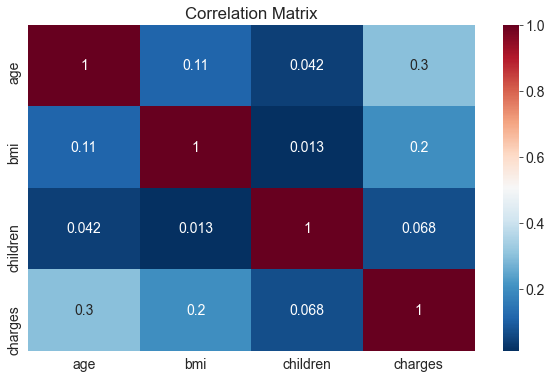

In [18]:
sns.heatmap(medical_df.corr(), cmap='RdBu_r', annot=True)
plt.title('Correlation Matrix');

Computers can't differentiate between correlation and causation, and decisions based on automated system can often have major consequences on society, so it's important to study why automated systems lead to a given result. Determining cause-effect relationships requires human insight.

# 3. DATA PREPARATION

In [19]:
# !pip install numpy --quiet

In [5]:
import numpy as np

In [21]:
# !pip install scikit-learn --quiet

## Using Categorical Features

If we could use categorical columns like "smoker", we can train a single model for the entire dataset.

To use the categorical columns, we simply need to convert them to numbers. There are three common techniques for doing this:

1. If a categorical column has just two categories (it's called a binary category), then we can replace their values with 0 and 1.(Label encoding)
2. If a categorical column has more than 2 categories, we can perform one-hot encoding i.e. create a new column for each category with 1s and 0s.(Nominal)
3. If the categories have a natural order (e.g. cold, neutral, warm, hot), then they can be converted to numbers (e.g. 1, 2, 3, 4) preserving the order. (ordinal)




## Binary Categories

The "smoker" category has just two values "yes" and "no". Let's create a new column "smoker_code" containing 0 for "no" and 1 for "yes".


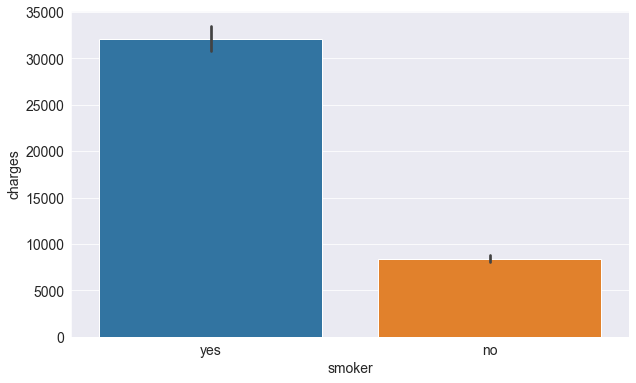

In [9]:
sns.barplot(data=medical_df, x='smoker', y='charges');

In [10]:
smoker_codes = {'no': 0, 'yes': 1}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_codes)

In [11]:
medical_df.charges.corr(medical_df.smoker_code)

0.7872514304984778

In [12]:
medical_df.head()


,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0


<AxesSubplot:xlabel='sex', ylabel='charges'>

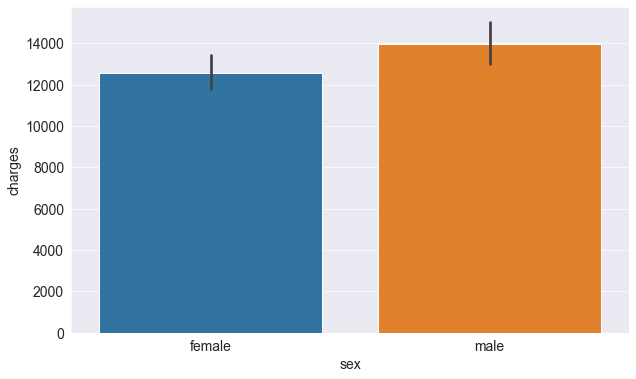

In [13]:
sns.barplot(data=medical_df, x='sex', y='charges')

In [14]:
sex_codes = {'female': 0, 'male': 1}

In [15]:
medical_df['sex_code'] = medical_df.sex.map(sex_codes)

In [16]:
medical_df.charges.corr(medical_df.sex_code)

0.05729206220202533

As you might expect, this does have a significant impact on the loss.


### One-hot Encoding

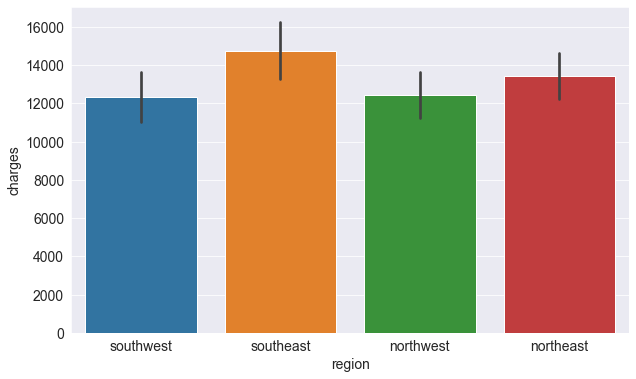

In [17]:
sns.barplot(data=medical_df, x='region', y='charges');

In [18]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [19]:
one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [20]:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

In [21]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


<AxesSubplot:>

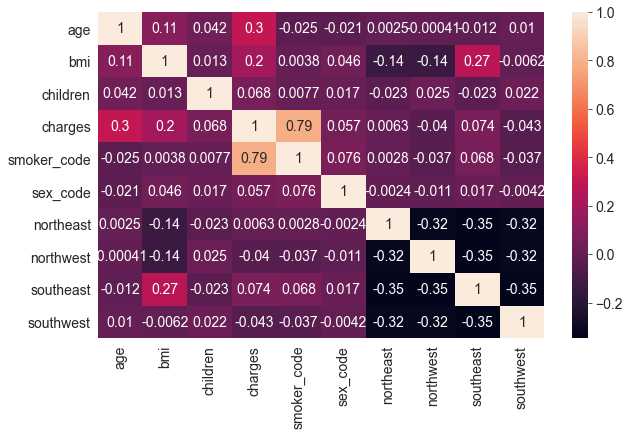

In [22]:
sns.heatmap(medical_df.corr(), annot=True)

# EXTRACTING THE FEATURES THATS REQUIRED FOR THE MODEL

# Creating a Test Set


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
input_data = medical_df[['age','bmi','children','smoker_code','sex_code']]
input_data.head()

,age,bmi,children,smoker_code,sex_code
0,19,27.900,0,1,0
1,18,33.770,1,0,1
2,28,33.000,3,0,1
3,33,22.705,0,0,1
4,32,28.880,0,0,1


In [25]:
# targeted value 
output_data = medical_df['charges']

In [26]:
x_train, x_test, y_train, y_test = train_test_split(input_data, output_data, test_size = 0.2, random_state = 1)

In [27]:
print(x_train.shape)
len(y_train.shape)

(1070, 5)


1


## Feature Scaling

The important feature are:

1. Smoker
2. Age
3. BMI


# Standardization 

* Standardized the numerical data
* Encoded the categorical data
* Concatenate the both standardized-numerical and encoded-categorical data to make a single dataset for training and testing.  

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [62]:
x_train_numerical = x_train[['age','bmi','children']].values
x_train_std = sc.fit(x_train_numerical)
data_mean = x_train_std.mean_
data_var = x_train_std.var_

In [65]:
mean_var_df = pd.DataFrame({"mean":data_mean,"variance":data_var})
mean_var_df.to_json("mean_variance.json")

In [44]:
x_train_numerical = sc.transform(x_train_numerical)
x_train_numerical

array([[ 1.00228629, -0.66474472, -0.90705771],
       [ 1.00228629, -1.51402369, -0.07894188],
       [-1.50426607,  1.08117685, -0.90705771],
       ...,
       [ 0.85905473,  0.70063454,  0.74917395],
       [ 0.07128113, -1.38009893,  0.74917395],
       [ 1.28874942, -0.44589206, -0.07894188]])

In [45]:
categorical_data = x_train[['smoker_code','sex_code']].values
categorical_data

array([[0, 0],
       [0, 1],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [0, 1]], dtype=int64)

In [46]:
x_train_final = np.concatenate((x_train_numerical,categorical_data),axis=1)
x_train_final

array([[ 1.00228629, -0.66474472, -0.90705771,  0.        ,  0.        ],
       [ 1.00228629, -1.51402369, -0.07894188,  0.        ,  1.        ],
       [-1.50426607,  1.08117685, -0.90705771,  0.        ,  1.        ],
       ...,
       [ 0.85905473,  0.70063454,  0.74917395,  1.        ,  0.        ],
       [ 0.07128113, -1.38009893,  0.74917395,  1.        ,  0.        ],
       [ 1.28874942, -0.44589206, -0.07894188,  0.        ,  1.        ]])

In [47]:
x_test_numerical = x_test[['age','bmi','children']].values
x_test_numerical = sc.transform(x_test_numerical)
categorical_data_x_test = x_test[['smoker_code','sex_code']].values
x_test_final = np.concatenate((x_test_numerical,categorical_data_x_test),axis=1)
x_test_final

array([[-1.43265029,  0.79372858, -0.90705771,  0.        ,  1.        ],
       [ 1.28874942,  0.1420703 , -0.90705771,  0.        ,  1.        ],
       [ 0.85905473,  1.03381321, -0.90705771,  0.        ,  1.        ],
       ...,
       [ 0.5725916 ,  1.35065959,  0.74917395,  1.        ,  1.        ],
       [-1.43265029,  0.96440099, -0.90705771,  0.        ,  0.        ],
       [-0.28679778, -0.74232309, -0.90705771,  0.        ,  0.        ]])

# 4.  MODELS TRAINING AND TESTING 

In [48]:
# pip install tensorflow --quiet

In [49]:
# sc.transform([[33,22.705,0]])

In [50]:
# pred = model.predict([[-0.4419476 , -1.30553108, -0.90861367,0,1]])
# print(pred)

In [51]:
from tensorflow import keras
from keras.models import Sequential

In [52]:
model = Sequential([
        keras.layers.Dense(128, activation = "relu",input_shape=(5,),use_bias=True),
        keras.layers.Dense(64 , activation='relu'),
        keras.layers.Dense(32 , activation='relu'),
        keras.layers.Dense(1)
    ])

In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               768       
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11,137
Trainable params: 11,137
Non-trainable params: 0
_________________________________________________________________


In [54]:
from tensorflow.keras.optimizers import Adam
adam = Adam(0.001)
model.compile(optimizer=adam,loss="mean_squared_error")

In [55]:
model.fit(x_train_final , y_train , epochs=300, validation_data=(x_test_final,y_test))

Epoch 1/300
34/34 [==============================] - 2s 9ms/step - loss: 320844384.0000 - val_loss: 329550720.0000
Epoch 2/300
34/34 [==============================] - 0s 3ms/step - loss: 320441152.0000 - val_loss: 328560320.0000
Epoch 3/300
34/34 [==============================] - 0s 3ms/step - loss: 317931712.0000 - val_loss: 323311168.0000
Epoch 4/300
34/34 [==============================] - 0s 3ms/step - loss: 308458528.0000 - val_loss: 306111456.0000
Epoch 5/300
34/34 [==============================] - 0s 3ms/step - loss: 281538816.0000 - val_loss: 265840480.0000
Epoch 6/300
34/34 [==============================] - 0s 3ms/step - loss: 230212768.0000 - val_loss: 198991440.0000
Epoch 7/300
34/34 [==============================] - 0s 3ms/step - loss: 159999840.0000 - val_loss: 128474064.0000
Epoch 8/300
34/34 [==============================] - 0s 3ms/step - loss: 108461352.0000 - val_loss: 92655528.0000
Epoch 9/300
34/34 [==============================] - 0s 3ms/step - loss: 90352944

## SOME CONCLUSION FROM THE ABOVE MODEL

* On using optimizes other than Adam the loss was ranging from -inf to +inf 
* This is because of **exploding gradient** 
* On using Adam optimizer it shows a finite loss
* So tuning the hyperparameter is essential to minimized the loss.  


In [56]:
# medical_df.head()

In [57]:
# pred = model.predict(sc.transform([[18,33.770,1,0,1]]))
# pred
# print(minMax.inverse_transform(pred))

# 5.  FINE TUNING

In [58]:
#pip install keras-tuner --quiet

In [59]:
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from keras_tuner.tuners import RandomSearch 


## Hyperparameters

- How many number of hidden layers we should have?
- How many number of neurons we should have in hidden layers?
- Learning Rate

In [60]:
# from keras import backend as K
# def root_mean_squared_error(y_true, y_pred):
#         return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [61]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss= hp.Choice('loss' , ['mean_absolute_error','mean_squared_error']),
    metrics= hp.Choice('metrics' , ['mean_absolute_error','mean_squared_error']))
    return model

In [62]:
tuner  = RandomSearch(
    build_model,
    objective=['val_mean_absolute_error','val_mean_squared_error'],
    max_trials=5,
    executions_per_trial=3,
    directory='Hyperparameter_tuning',
    project_name='Insurance estimator'
)

In [63]:
tuner.search_space_summary()

Search space summary
Default search space size: 6
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
loss (Choice)
{'default': 'mean_absolute_error', 'conditions': [], 'values': ['mean_absolute_error', 'mean_squared_error'], 'ordered': False}
metrics (Choice)
{'default': 'mean_absolute_error', 'conditions': [], 'values': ['mean_absolute_error', 'mean_squared_error'], 'ordered': False}


In [ ]:
tuner.search(x_train_final , y_train , epochs=500 , validation_data = (x_test_final , y_test))

In [65]:
tuner.results_summary()

Results summary
Results in Hyperparameter_tuning\Insurance estimator
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 11
units_0: 256
units_1: 384
learning_rate: 0.01
loss: mean_absolute_error
metrics: mean_absolute_error
units_2: 480
units_3: 480
units_4: 320
units_5: 352
units_6: 192
units_7: 320
units_8: 480
units_9: 384
units_10: 320
units_11: 160
units_12: 192
units_13: 320
units_14: 96
units_15: 192
Score: 1411.4945068359375
Trial summary
Hyperparameters:
num_layers: 11
units_0: 96
units_1: 160
learning_rate: 0.0001
loss: mean_absolute_error
metrics: mean_absolute_error
units_2: 32
units_3: 32
units_4: 32
units_5: 32
units_6: 32
units_7: 32
units_8: 32
units_9: 32
units_10: 32
Score: 1566.4409586588542
Trial summary
Hyperparameters:
num_layers: 17
units_0: 352
units_1: 224
learning_rate: 0.01
loss: mean_absolute_error
metrics: mean_squared_error
units_2: 96
units_3: 64
units_4: 64
units_5: 352
units_6: 160
units_7: 320
units_8: 384
units_9: 416
units_10: 352
unit


        Results summary
        Results in Hyperparameter_tuning\Insurance estimator
        Showing 10 best trials
        <keras_tuner.engine.objective.MultiObjective object at 0x000002550A5290A0>
        Trial summary
        Hyperparameters:
        num_layers: 11
        units_0: 256
        units_1: 384
        learning_rate: 0.01
        loss: mean_absolute_error
        metrics: mean_absolute_error
        units_2: 480
        units_3: 480
        units_4: 320
        units_5: 352
        units_6: 192
        units_7: 320
        units_8: 480
        units_9: 384
        units_10: 320
        units_11: 160
        units_12: 192
        units_13: 320
        units_14: 96
        units_15: 192
        Score: 1411.4945068359375 


In [70]:
model = Sequential([
        keras.layers.Dense(256, activation = "relu",input_shape=(5,)),
        keras.layers.Dense(384 , activation='relu'),
        keras.layers.Dense(480 , activation='relu'),
        keras.layers.Dense(480 , activation='relu'),
        keras.layers.Dense(320 , activation='relu'),
        keras.layers.Dense(352 , activation='relu'),
        keras.layers.Dense(192 , activation='relu'),
        keras.layers.Dense(320 , activation='relu'),
        keras.layers.Dense(480 , activation='relu'),
        keras.layers.Dense(384, activation='relu'),
        keras.layers.Dense(320 , activation='relu'),
        keras.layers.Dense(160 , activation='relu'),
        keras.layers.Dense(1,activation='linear')
    ])
    

In [71]:
from tensorflow.keras.optimizers import Adam
adam = Adam(0.01)
model.compile(optimizer=adam,loss="mean_absolute_error")

In [72]:
model.fit(x_train_final , y_train , epochs=500, validation_data=(x_test_final,y_test))

Epoch 1/500
34/34 [==============================] - 2s 17ms/step - loss: 11781.7881 - val_loss: 8542.5146
Epoch 2/500
34/34 [==============================] - 0s 13ms/step - loss: 5672.1709 - val_loss: 3296.1211
Epoch 3/500
34/34 [==============================] - 0s 13ms/step - loss: 3143.6453 - val_loss: 7024.6157
Epoch 4/500
34/34 [==============================] - 0s 13ms/step - loss: 4012.8350 - val_loss: 2862.9026
Epoch 5/500
34/34 [==============================] - 0s 12ms/step - loss: 3189.1809 - val_loss: 3261.9141
Epoch 6/500
34/34 [==============================] - 0s 13ms/step - loss: 3080.4961 - val_loss: 3274.3535
Epoch 7/500
34/34 [==============================] - 0s 13ms/step - loss: 3532.8179 - val_loss: 3034.5784
Epoch 8/500
34/34 [==============================] - 0s 13ms/step - loss: 3513.9780 - val_loss: 2695.9395
Epoch 9/500
34/34 [==============================] - 0s 13ms/step - loss: 2507.6655 - val_loss: 2022.4554
Epoch 10/500
34/34 [=========================

In [76]:
x_test.head()

,age,bmi,children,smoker_code,sex_code
559,19,35.53,0,0,1
1087,57,31.54,0,0,1
1020,51,37.00,0,0,1
460,49,36.63,3,0,0
802,21,22.30,1,0,1


In [109]:
pred = model.predict([[x_test_final]])
count = 0
limit = 2000
total_test_size = len(x_test_final)
for i in range(total_test_size):
    if(abs(pred[i][0]-y_test.values[i]) >= limit):
        count = count + 1

print("Out of ",total_test_size , "data points " ,count , "has difference of above",limit,".")
print(((total_test_size-count)*100)/total_test_size , "%")

Out of  268 data points  24 has difference of above 2000 .
91.04477611940298 %


# 6. SAVING THE MODEL

In [110]:
model.save("Model.h5")

In [ ]:
# !pip install tensorflowjs

In [112]:
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(model, "Js_Model")

# 7.  CONCLUSION